Sistema inteligente con Red neuronal artificial MLP que clasifica si en una imagen hay un gato

https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

Vinculo con github para acceso a comun




In [ ]:
! git clone https://github.com/FNLucero/CatsRecognizer

Se importan las librerias necesarias para el manejo de imágenes

In [16]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from random import randint

Carga de imágenes de Gatitos y redimención de las imágenes a 100x100

In [17]:
michis_path = "./datos/cats"
michis = []
img_size = 100
for img in os.listdir(michis_path):
  img = cv2.imread(os.path.join(michis_path, img))
  img_resize = cv2.resize(img, (img_size, img_size))
  michis.append(img_resize)

Carga de set de datos de gatos

In [18]:
michis = np.array(michis)
print(michis.shape)
#cantidad, alto, ancho y escala de colores

(100, 100, 100, 3)


(100, 100, 3)


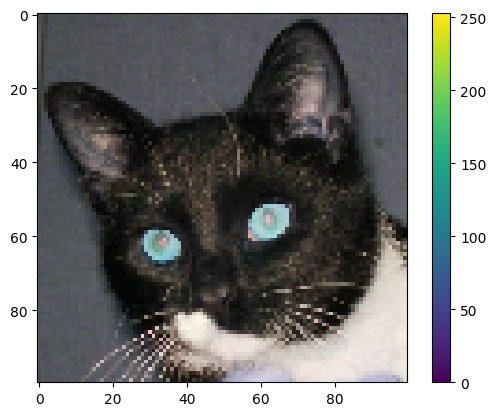

In [23]:
#Se muestra una imagen al azar para ver como se visualiza
num = randint(0,99)
print(michis[num].shape)
plt.figure()
plt.imshow(np.squeeze(michis[num]))
plt.colorbar()
plt.grid(False)
plt.show()

Carga de imagenes de NO Gatos

In [26]:
no_michis_path = "./datos/dog"
no_michis = []
img_size = 100
for img in os.listdir(no_michis_path):
  img = cv2.imread(os.path.join(no_michis_path, img))
  img_resize = cv2.resize(img, (img_size, img_size))
  no_michis.append(img_resize)

In [27]:
no_michis = np.array(no_michis)
print(no_michis.shape)
#cantidad, alto, ancho y escala de colores

(100, 100, 100, 3)


(100, 100, 3)


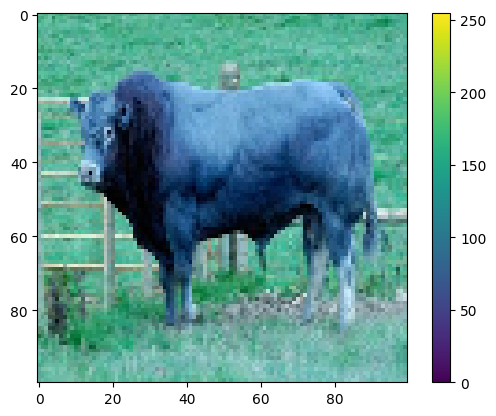

In [34]:
#Se muestra una imagen al azar para ver como se visualiza
num = randint(0,99)
print(no_michis[num].shape)
plt.figure()
plt.imshow(np.squeeze(no_michis[num]))
plt.colorbar()
plt.grid(False)
plt.show()

Unificación de listas

In [36]:
#Unificamos listas para generar las etiquetas clasificando los gatos de lo que no es
imagines = np.concatenate([michis, no_michis])
print(len(imagines))
imagines = np.array(imagines)

#cantidad total de imagenes, alto, ancho, canales de color(RGB))
print(imagines.shape)

200
(200, 100, 100, 3)


In [37]:
#Generamos los tensores para cada etiqueta
label_michis = np.repeat(0, 100)
label_no_michis = np.repeat(1, 100)

In [38]:
#Generamos una clase para asociar los tensores a las etiquetas
class_names_michis = ['Michis', 'No_Michis']
label_all = np.concatenate([label_michis, label_no_michis])
label_all = np.array(label_all)

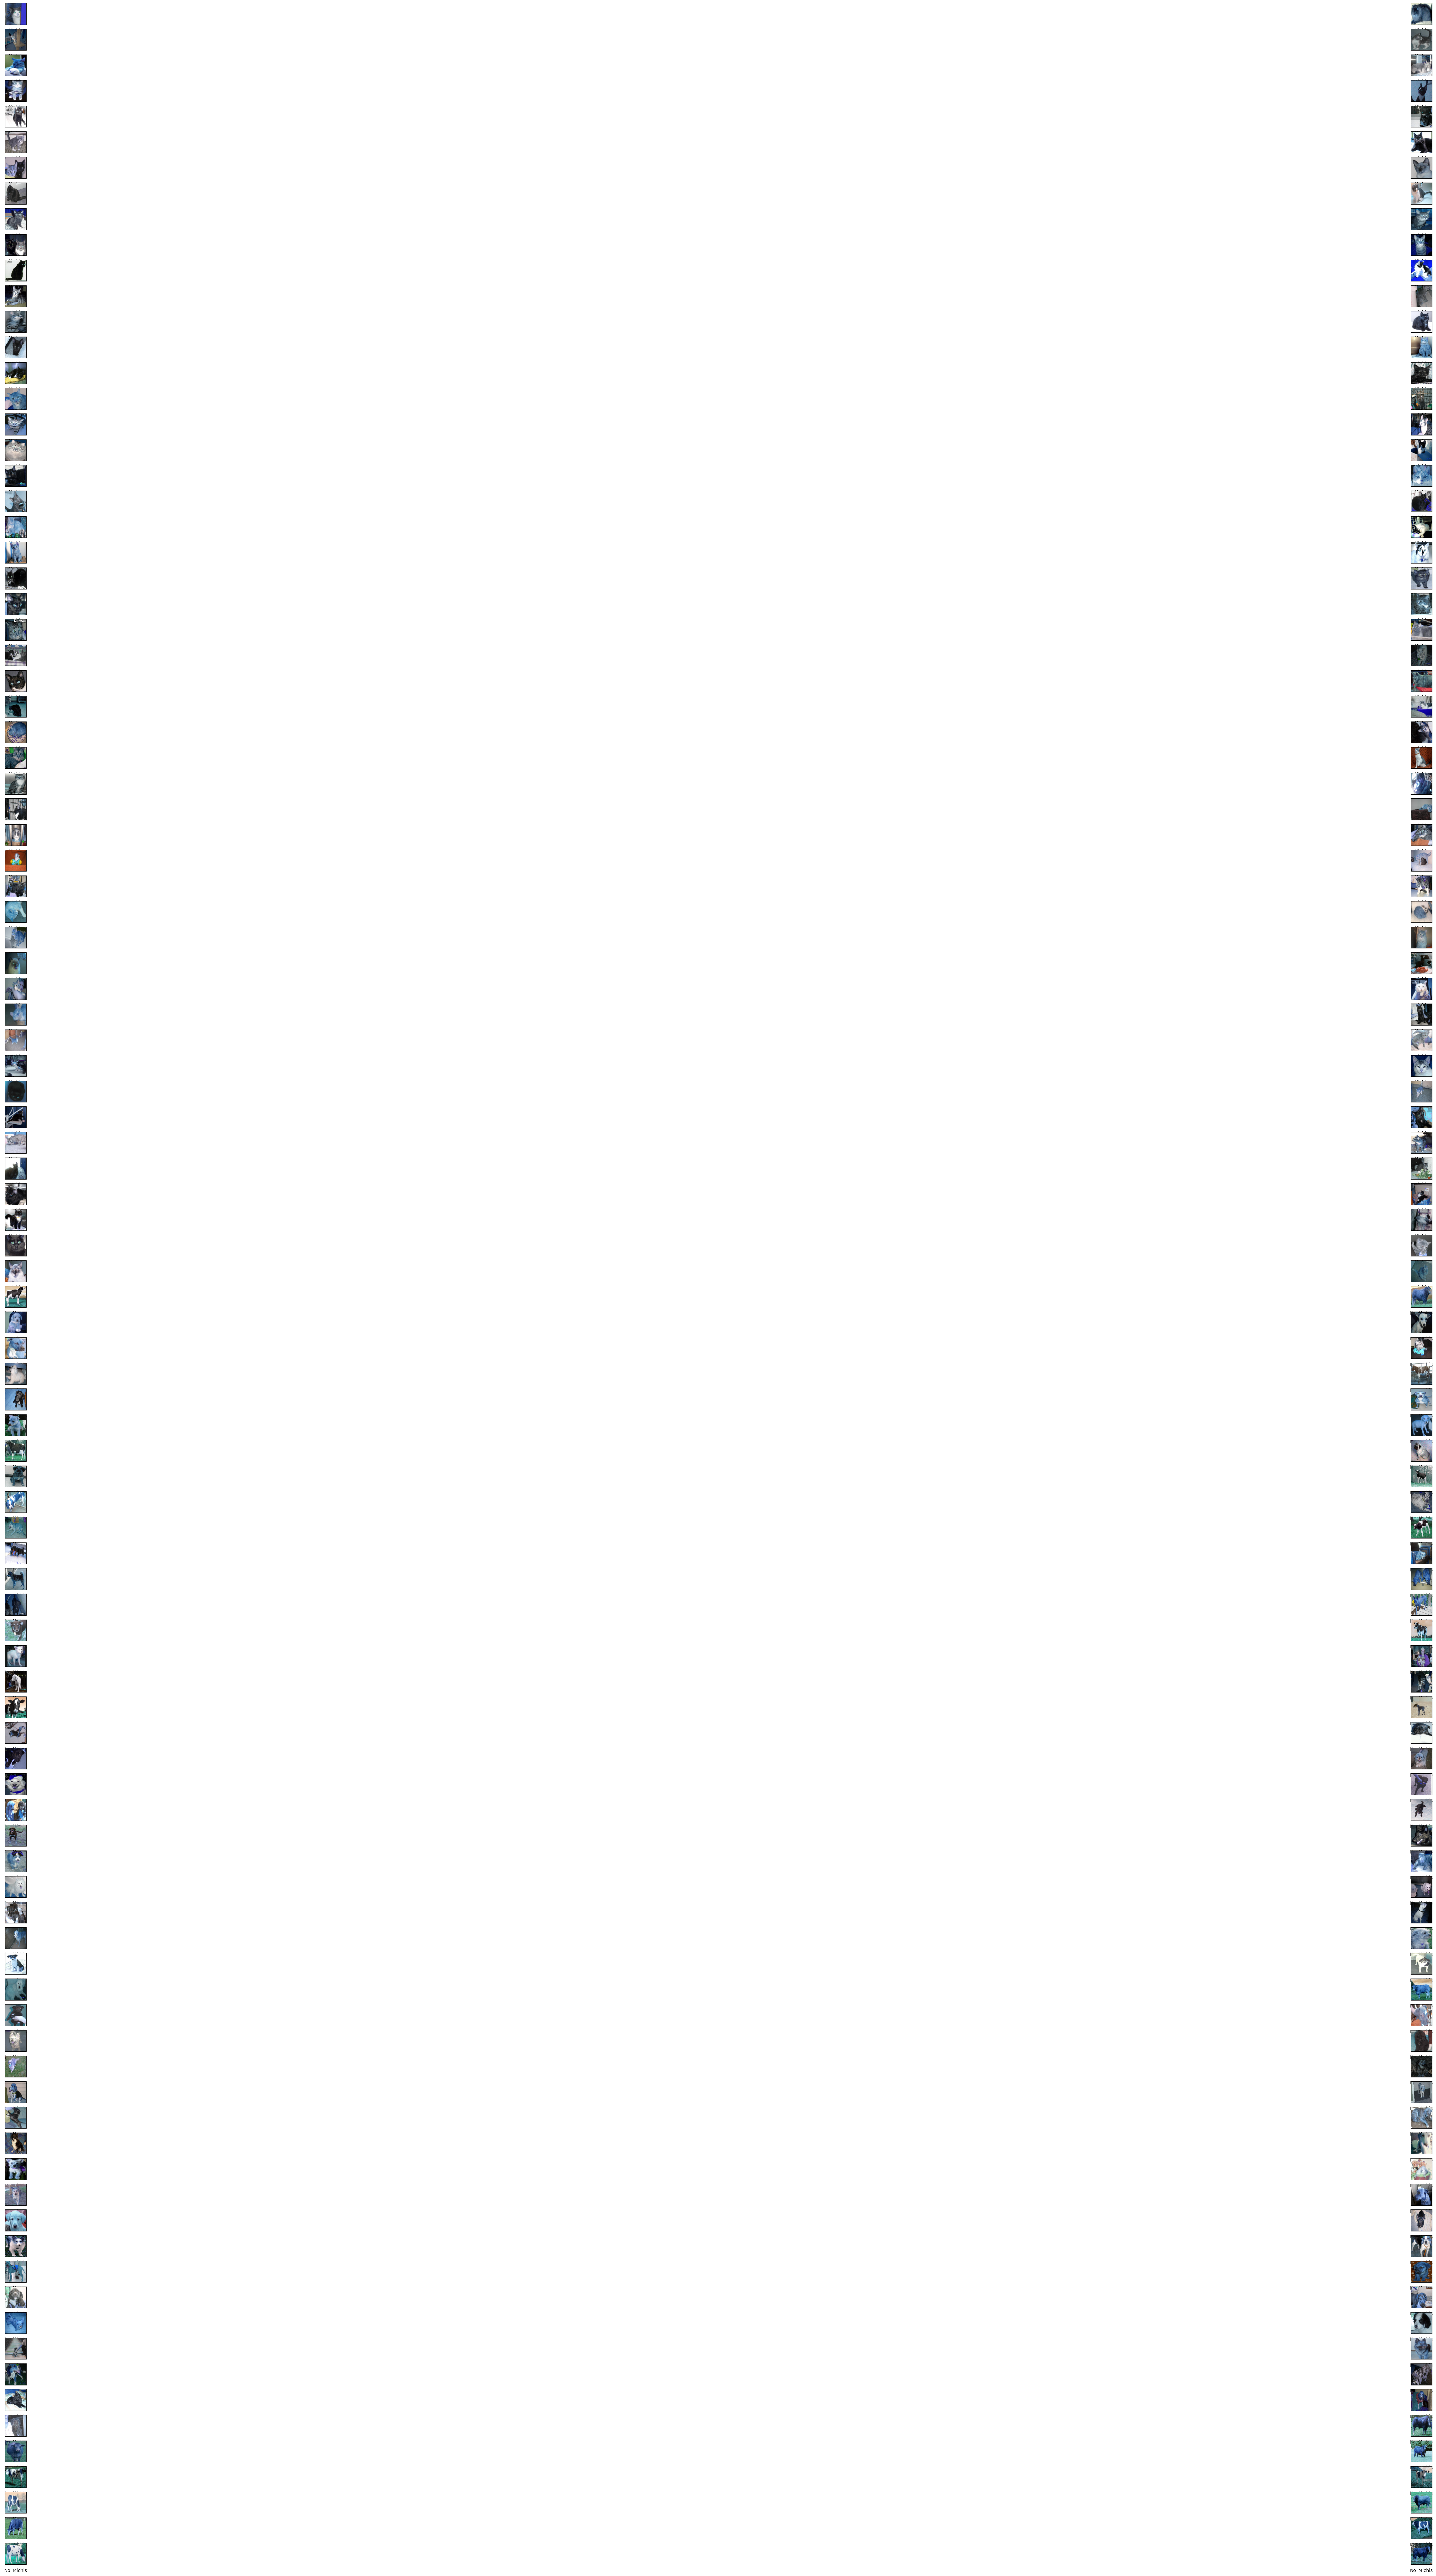

In [39]:
#Se procede a plotear las imagenes
plt.figure(figsize=(100,100))
for i in range(200):
    plt.subplot(100,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagines[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_michis[label_all[i]])
plt.show()

In [40]:
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer
import numpy as np
import matplotlib.pyplot as plt

# Construccion del modelo para la clasificacion 

In [41]:
#configuracion de capas de red neuronal artificial
model = keras.Sequential([                   
    keras.layers.Flatten(input_shape=(100, 100, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

# Compilacion del modelo

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del Modelo

In [43]:
trained = model.fit(imagines, label_all, epochs=30)

Epoch 1/30
7/7 [==============================] - 2s 39ms/step - loss: 2819.1995 - accuracy: 0.4450
Epoch 2/30
7/7 [==============================] - 0s 48ms/step - loss: 1026.3253 - accuracy: 0.4950
Epoch 3/30
7/7 [==============================] - 0s 42ms/step - loss: 674.9762 - accuracy: 0.5450
Epoch 4/30
7/7 [==============================] - 0s 41ms/step - loss: 473.9660 - accuracy: 0.5950
Epoch 5/30
7/7 [==============================] - 0s 42ms/step - loss: 511.3106 - accuracy: 0.5950
Epoch 6/30
7/7 [==============================] - 0s 45ms/step - loss: 603.0419 - accuracy: 0.6000
Epoch 7/30
7/7 [==============================] - 0s 41ms/step - loss: 307.4591 - accuracy: 0.6700
Epoch 8/30
7/7 [==============================] - 0s 39ms/step - loss: 401.4703 - accuracy: 0.6550
Epoch 9/30
7/7 [==============================] - 0s 44ms/step - loss: 522.0015 - accuracy: 0.6300
Epoch 10/30
7/7 [==============================] - 0s 39ms/step - loss: 338.0827 - accuracy: 0.6600
Epoch 1

## Evaluacion del rendimiento del modelo

In [54]:
test_loss, test_acc = model.evaluate(imagines,  label_all, verbose=2)
print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 40.6527 - accuracy: 0.8650 - 94ms/epoch - 13ms/step

Test accuracy: 0.8650000095367432


In [45]:
#Luego del entrenamiento del modelo,tomamos una imagen de las que se cargaron para probar individualmente
prueba_michi = imagines[45]
print(prueba_michi.shape)

prueba_michi = np.expand_dims(prueba_michi, 0)
print(prueba_michi.shape)

(100, 100, 3)
(1, 100, 100, 3)


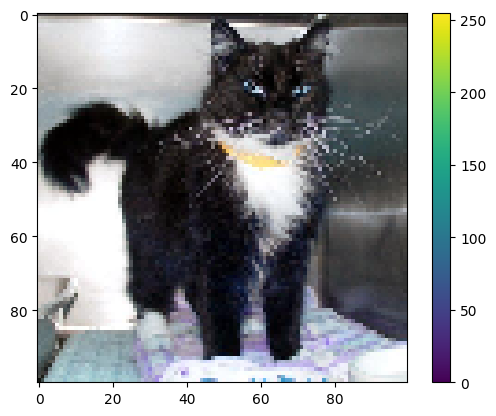

In [47]:
num = randint(0,99)
plt.figure()
plt.imshow(imagines[num])
plt.colorbar()
plt.grid(False)
plt.show()

In [49]:
#se verifica la relacion tensor y class de una de las imagenes cargadas y ya entrenadas
predictions_single = model.predict(prueba_michi)

print("> Nro de Etiqueta o tensor: ", np.argmax(predictions_single))
print("> Etiqueta: ", class_names_michis[np.argmax(predictions_single)])

1/1 [==============================] - 0s 46ms/step
> Nro de Etiqueta o tensor:  0
> Etiqueta:  Michis


# Prediccion

Se procede a probar algunas imágenes que no formen parte del set de datos para corroborar el funcionamiento de la Red neuronal artificial

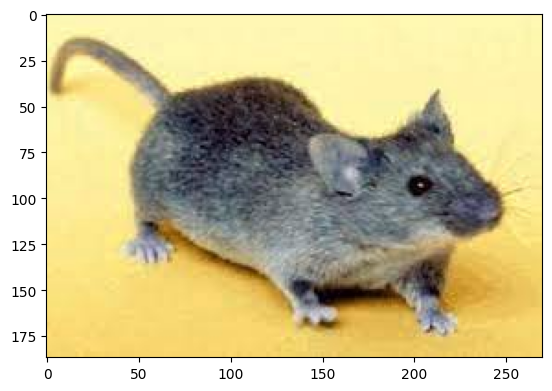

(1, 100, 100, 3)
1/1 [==============================] - 0s 182ms/step
> Nro de Etiqueta o tensor:  1
> Etiqueta:  No_Michis


In [70]:
#Ejemplo 1
img_a_predecir = cv2.imread('./datos/pruebas/raton.jpg')

plt.imshow(img_a_predecir)
plt.show()

#Se ajustan las dimensiones para que sea como las imágenes aprendidas
img_a_predecir = cv2.resize(img_a_predecir, (img_size, img_size))
img_a_predecir = np.expand_dims(img_a_predecir, 0)
#etiqueta, alto, ancho y canales de color (RGB)
print(img_a_predecir.shape)

predictions_single = model.predict(img_a_predecir)

print("> Nro de Etiqueta o tensor: ", np.argmax(predictions_single))
print("> Etiqueta: ", class_names_michis[np.argmax(predictions_single)])

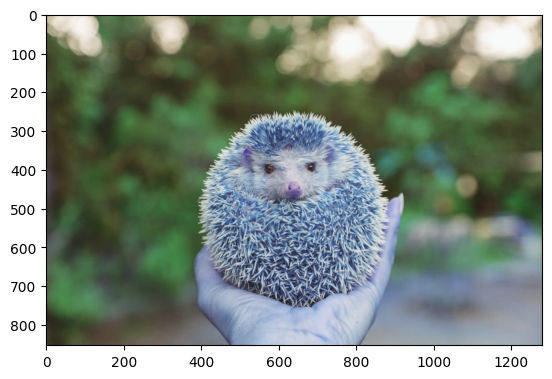

(1, 100, 100, 3)
1/1 [==============================] - 0s 49ms/step
> Nro de Etiqueta o tensor:  0
> Etiqueta:  Michis


In [68]:
#Ejemplo 2
img_a_predecir = cv2.imread('./datos/pruebas/erizo.jpg')

plt.imshow(img_a_predecir)
plt.show()

#Se ajustan las dimensiones para que sea como las imágenes aprendidas
img_a_predecir = cv2.resize(img_a_predecir, (img_size, img_size))
img_a_predecir = np.expand_dims(img_a_predecir, 0)
#etiqueta, alto, ancho y canales de color (RGB)
print(img_a_predecir.shape)

predictions_single = model.predict(img_a_predecir)

print("> Nro de Etiqueta o tensor: ", np.argmax(predictions_single))
print("> Etiqueta: ", class_names_michis[np.argmax(predictions_single)])